# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [31]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
!pip install palmerpenguins

In [34]:
# Importing Penguins Data
from palmerpenguins import load_penguins

penguins = load_penguins()

# Dropping NA's
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
# Dummifying Variables with One-Hot-Encoder and ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

enc = OneHotEncoder()

ct = make_column_transformer(
    (enc, ['species','sex','island']),
    remainder="passthrough"  # all other columns in X will be passed through
)

# # Alternative Option by Naming Processes
# ct = ColumnTransformer(
#     [("dummify_s", enc, ['species']),
#     ("dummify_i", enc, ['island']),
#     ("dummify_sex", enc, ['sex'])]
# )

# Creating Linear Regression Object
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Creating Pipeline
pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]
)

# # Applying Pipeline to Data
# from sklearn.pipeline import make_pipeline

# # Alternative by Not Naming Processes
# pipeline = make_pipeline(
#     ct,lr
# )

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [49]:
# Model 1

# Specifying Training/Test Sets
from sklearn.model_selection import train_test_split

X1 = penguins[["bill_length_mm","species","island","sex"]]
y = penguins["bill_depth_mm"]
cols1 = len(X1.columns)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25)


# Fitting Pipeline
pipeline.fit(X_train,y_train)

# Calculate the model predictions on the training data
y_train_ = pipeline.predict(X=X_train)

# Finding RMSE of Training Data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_)

rmse_train1 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train1)

# Finding RMSE of Validation Set

# get model's predictions on validation set
y_test_ = pipeline.predict(X_test)

rmse_val1 = np.sqrt(mean_squared_error(y_test, y_test_))
print("Validation RMSE:",rmse_val1)

Training RMSE: 0.7802420768810469
Validation RMSE: 0.9179909890189298


In [50]:
# Model 2

# Specifying Training/Test Sets
from sklearn.model_selection import train_test_split

X2 = penguins[["bill_length_mm","species","island","sex","body_mass_g"]]
cols2 = len(X2.columns)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)


# Fitting Pipeline
pipeline.fit(X_train,y_train)

# Calculate the model predictions on the training data
y_train_ = pipeline.predict(X=X_train)

# Finding RMSE of Training Data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_)

rmse_train2 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train2)

# Finding RMSE of Validation Set

# get model's predictions on validation set
y_test_ = pipeline.predict(X_test)

rmse_val2 = np.sqrt(mean_squared_error(y_test, y_test_))
print("Validation RMSE:",rmse_val2)

Training RMSE: 0.8136332670145674
Validation RMSE: 0.7224495908670852


In [51]:
# Model 3

# Specifying Training/Test Sets
from sklearn.model_selection import train_test_split

X3 = penguins[["bill_length_mm","species","island","sex","body_mass_g","year"]]
cols3 = len(X3.columns)

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25)


# Fitting Pipeline
pipeline.fit(X_train,y_train)

# Calculate the model predictions on the training data
y_train_ = pipeline.predict(X=X_train)

# Finding RMSE of Training Data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_)

rmse_train3 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train3)

# Finding RMSE of Validation Set

# get model's predictions on validation set
y_test_ = pipeline.predict(X_test)

rmse_val3 = np.sqrt(mean_squared_error(y_test, y_test_))
print("Validation RMSE:",rmse_val3)

Training RMSE: 0.7694337714619794
Validation RMSE: 0.8466246539677629


In [52]:
# Model 4

# Specifying Training/Test Sets
from sklearn.model_selection import train_test_split

X4 = penguins[["bill_length_mm","species","island","sex","body_mass_g","flipper_length_mm","year"]]
cols4 = len(X4.columns)

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)


# Fitting Pipeline
pipeline.fit(X_train,y_train)

# Calculate the model predictions on the training data
y_train_ = pipeline.predict(X=X_train)

# Finding RMSE of Training Set
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_)

rmse_train4 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train4)

# Finding RMSE of Validation Set

# get model's predictions on validation set
y_test_ = pipeline.predict(X_test)

rmse_val4 = np.sqrt(mean_squared_error(y_test, y_test_))
print("Validation RMSE:",rmse_val4)

print()

Training RMSE: 0.7463271839906604
Validation RMSE: 0.85865426332377



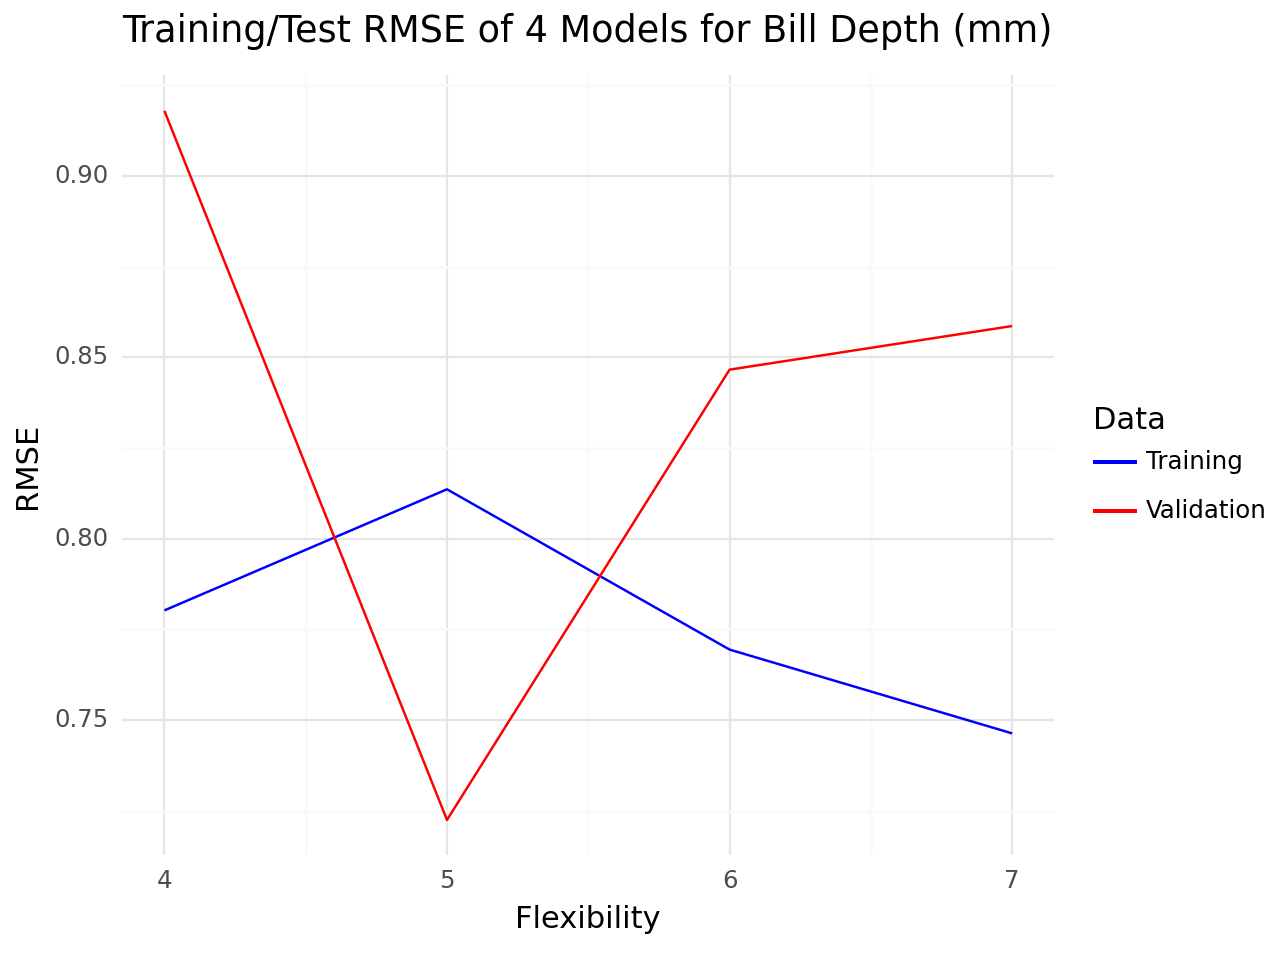

<Figure Size: (640 x 480)>

In [79]:
# Creating Plot

# Creating Lists of RMSE's and Number of Predictors
rmse_train_list = [rmse_train1,rmse_train2,rmse_train3,rmse_train4]
rmse_val_list = [rmse_val1,rmse_val2,rmse_val3,rmse_val4]
predictor_num_list = [cols1,cols2,cols3,cols4]


# Creating a DataFrame for plotting
rmse_df = pd.DataFrame({'rmse_train': rmse_train_list, 'rmse_val': rmse_val_list, 'predictors': predictor_num_list})

from plotnine import *

(ggplot(rmse_df,
        aes(x="predictors"))
+ geom_line(aes(y='rmse_train', color='"blue"'))
+ geom_line(aes(y='rmse_val', color='"red"'))
+ theme_minimal()
# Adding Labels
+ labs(x="Flexibility",
       y="RMSE",
       title="Training/Test RMSE of 4 Models for Bill Depth (mm)",
       color="Data")
# Add color scale identity for Legend Labels
+ scale_color_identity(
    guide='legend',
    breaks=['red', 'blue'],
    labels=['Training', 'Validation'])
)



The model that performed the best was Model 3, which had `bill_length_mm`,`species`, `island`, `sex`, and `body_mass_g` as predictors, as it had the lowest RMSE of the 4 models predicted for the validation set by a decent margin, even though it had the highest training RMSE of the 4 models.